In [1]:
import numpy as np

def calc_posterior(mi, prior=0.5, prec = 100000):
    test_vals = [x / prec for x in range(1, prec)]
    max_t = None
    for t in test_vals:
        if t*np.log(t/prior)+(1-t)*np.log((1-t)/(1-prior)) <= mi:
            if  max_t is None or t > max_t:
                max_t = t
    return max_t

def dp_epsilon_to_posterior_success(epsilon):
    return 1 - 1./(1+np.exp(epsilon))

def dp_ps_to_epsilon(ps):
    return np.log(ps / (1-ps))

In [2]:
mi_to_eps = {}
for mi in [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]:
    ps = calc_posterior(mi)
    mi_to_eps[mi] = dp_ps_to_epsilon(ps)

In [4]:
q4_results = {"1-URGENT": 10594,
"2-HIGH": 10476,
"3-MEDIUM": 10410,
"4-NOT SPECIFIED": 10556,
"5-LOW": 10487}


# o_orderpriority,order_count
# 1-URGENT,10594
# 2-HIGH,10476
# 3-MEDIUM,10410
# 4-NOT SPECIFIED,10556
# 5-LOW,10487


In [5]:
results = {}
mi_range = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]
for key in q4_results:
    results[key] = []
    true_count = q4_results[key]
    for mi in mi_range:
        eps = mi_to_eps[mi]
        count_results = []
        for _ in range(1000):
            scale = 41. / eps  # Scale parameter for Laplace noise
            noise = np.random.laplace(loc=0, scale=scale)
            count_result = true_count + noise
            count_results.append(count_result)
        rel_error = np.average(
                        [100*abs(
                            count_results[i] - true_count
                            ) / true_count for i in range(len(count_results))]
                    )
        results[key].append(rel_error)

In [6]:
results

{'1-URGENT': [1.4691457609588119,
  1.0853619207971839,
  0.809052183407468,
  0.5134442760173706,
  0.349930851762274,
  0.2453219712985782,
  0.1312500206768343,
  0.03228138823274141,
  0.03440815862219206,
  0.032716451850850745],
 '2-HIGH': [1.581138297162303,
  1.0415293142939754,
  0.743868184727652,
  0.5651520890703415,
  0.3683708070930015,
  0.22785921719189917,
  0.12450476793541242,
  0.03458448287098632,
  0.03261806755810367,
  0.0335847856022274],
 '3-MEDIUM': [1.493441347763116,
  1.0635360914905392,
  0.8366703102787508,
  0.540438576672153,
  0.361540323100773,
  0.24377850869794862,
  0.12585410991681809,
  0.033241880561270226,
  0.034114847100423035,
  0.03471560561488771],
 '4-NOT SPECIFIED': [1.5342579865906096,
  1.0579754567489716,
  0.7966584952641684,
  0.5189507040788489,
  0.37466098367665657,
  0.22992718269593868,
  0.12716037612218425,
  0.03392873775967315,
  0.03488177824949488,
  0.03482138278238484],
 '5-LOW': [1.5405102943953348,
  1.07457250188063

In [7]:
q12_results = {
    ("MAIL", "high"): 6202,
    ("MAIL", "low"): 9324,
    ("SHIP", "high"): 6200,
    ("SHIP", "low"): 9262
}
# l_shipmode,high_line_count,low_line_count
# MAIL,6202,9324
# SHIP,6200,9262


In [8]:
num_items_per_customer = 178.

In [9]:
results = {}
mi_range = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]
for key in q12_results:
    results[key] = []
    true_count = q12_results[key]
    for mi in mi_range:
        eps = mi_to_eps[mi]
        count_results = []
        for _ in range(1000):
            scale = num_items_per_customer / eps  # Scale parameter for Laplace noise
            noise = np.random.laplace(loc=0, scale=scale)
            count_result = true_count + noise
            count_results.append(count_result)
        rel_error = np.average(
                        [100*abs(
                            count_results[i] - true_count
                            ) / true_count for i in range(len(count_results))]
                    )
        results[key].append(rel_error)

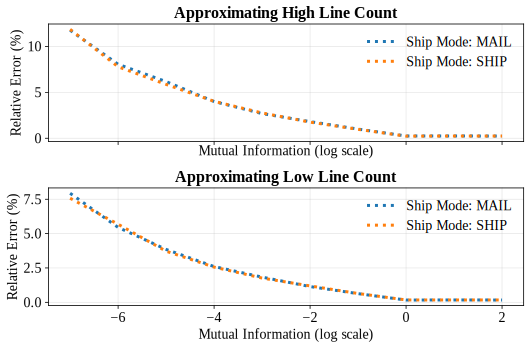

In [10]:
import polars.selectors as cs
import numpy as np

import polars as pl

import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib_inline.backend_inline

import matplotlib.pyplot as plt

LATEX = False
if LATEX:
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["font.serif"] = "Times"
else:
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams["font.family"] = "Times New Roman"
    mpl.rcParams["mathtext.fontset"] = "stix"
    
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['savefig.dpi'] = 300

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

mpl.rcParams['axes.titleweight'] = 'bold'

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.frameon'] = False
fig, axes = plt.subplots(2, 1, figsize=(7.5, 5), sharex=True)
mi_range = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]
for ind, key in enumerate(['High', 'Low']):
    
    ax = axes[ind]

    for priority in ['MAIL', 'SHIP']:
        xs = [np.log2(x) for x in mi_range]
        y = results[(priority, key.lower())]
        ax.plot(xs, y, linestyle='dotted', linewidth=3,
            label=f'Ship Mode: {priority}'
        )

    ax.set_xlabel('Mutual Information (log scale)', fontsize=14)
    ax.set_ylabel(f'Relative Error (%)', fontsize=14)
    ax.set_title(f'Approximating {key} Line Count', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.legend(fontsize=14)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
#     plt.savefig('../figs/q12_dp.png', bbox_layout='tight')

In [15]:
results.

{('MAIL', 'high'): [90.62778225136462,
  70.91588102473911,
  49.59364156504827,
  33.58831512169789,
  21.550131056663997,
  14.181974590319642,
  7.719986247320794,
  2.157964311804407,
  2.0376304911365524,
  2.018231441594374],
 ('MAIL', 'low'): [63.147138674543484,
  48.41557400827717,
  32.28510276227443,
  21.162035202893158,
  15.768760787959033,
  10.022912405140396,
  5.32457381854073,
  1.4447984644878995,
  1.3538273404564038,
  1.4539581635994878],
 ('SHIP', 'high'): [100.18509894885878,
  71.19718141582561,
  51.84503393432787,
  32.42382136692055,
  22.01766828043262,
  14.89935891564341,
  8.918413339885232,
  2.228935652315517,
  2.2287395708865394,
  2.1576051783207197],
 ('SHIP', 'low'): [66.86144982426916,
  47.65966585258646,
  34.14982234864753,
  22.814526784207963,
  15.172207756229556,
  9.629491709732322,
  5.693050985032966,
  1.4578086352280093,
  1.5105356541192192,
  1.4510070373422141]}